In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
saws = pd.read_csv('med_center_saws.csv').set_index('Record #')
saws.head(1)

,Unnamed: 0,Prefix,Service Location,Suffix,ZIP Code,17-JAN,17-FEB,17-MAR,17-APR,17-MAY,...,20-MAR,20-APR,20-MAY,20-JUN,20-JUL,20-AUG,20-SEP,20-OCT,20-NOV,20-DEC
Record #,,,,,,,,,,,,,,,,,,,,,
274262,671,NaN,ACCOLON,DR,78229,6733,6733,6733,7481,6733,...,3740,5237,5985,5237,4489,13466,5985,5237,5237,5237


In [2]:
air = pd.read_csv('med_center_air.csv')
air.head(1)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,AlertTriggered,SensorStatus
0,2021-05-16T00:01:26,63e0b0eae3495a39,ATT,AQM-01-00-01-00-01-00-GY,29.51007,-98.580288,Medical Center,8,7,8,0,0,0,0,None,Normal


In [3]:
flood = pd.read_csv('med_center_flood.csv')
flood.head(1)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,Temp_C,Temp_F,DistToWL_ft,DistToWL_m,DistToDF_ft,DistToDF_m,AlertTriggered,SensorStatus
0,2021-05-15T00:11:55,400789,ATT,ranger sensor,29.511164,-98.586094,Medical Center,-999,-999,13.090551,3.99,13.500656,4.115,N,Normal


In [5]:
sound = pd.read_csv('med_center_sound.csv')
sound.head(1)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,NoiseLevel_db,AlertTriggered,SensorStatus
0,2021-05-16T00:01:26,63e0b0eae3495a39,ATT,AQM-01-00-01-00-01-00-GY,29.51007,-98.580288,Medical Center,60,None,Normal


In [6]:
weather = pd.read_csv('med_center_weather.csv')
weather.head(1)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,Temp_C,Temp_F,Humidity,DewPoint_C,DewPoint_F,Pressure_Pa,AlertTriggered,SensorStatus
0,2021-05-16T00:01:26,63e0b0eae3495a39,ATT,AQM-01-00-01-00-01-00-GY,29.51007,-98.580288,Medical Center,21,71,88,18.934569,66.082224,979,NaN,Normal


___
## SAWS Data Summary

In [8]:
saws.sample()

,Unnamed: 0,Record #,Prefix,Service Location,Suffix,ZIP Code,17-JAN,17-FEB,17-MAR,17-APR,...,20-MAR,20-APR,20-MAY,20-JUN,20-JUL,20-AUG,20-SEP,20-OCT,20-NOV,20-DEC
1910,144706,418297,NaN,LYCEUM,DR,78229,3740,2992,2992,3740,...,2992,2992,2992,3740,3740,4489,4489,3740,2992,5237


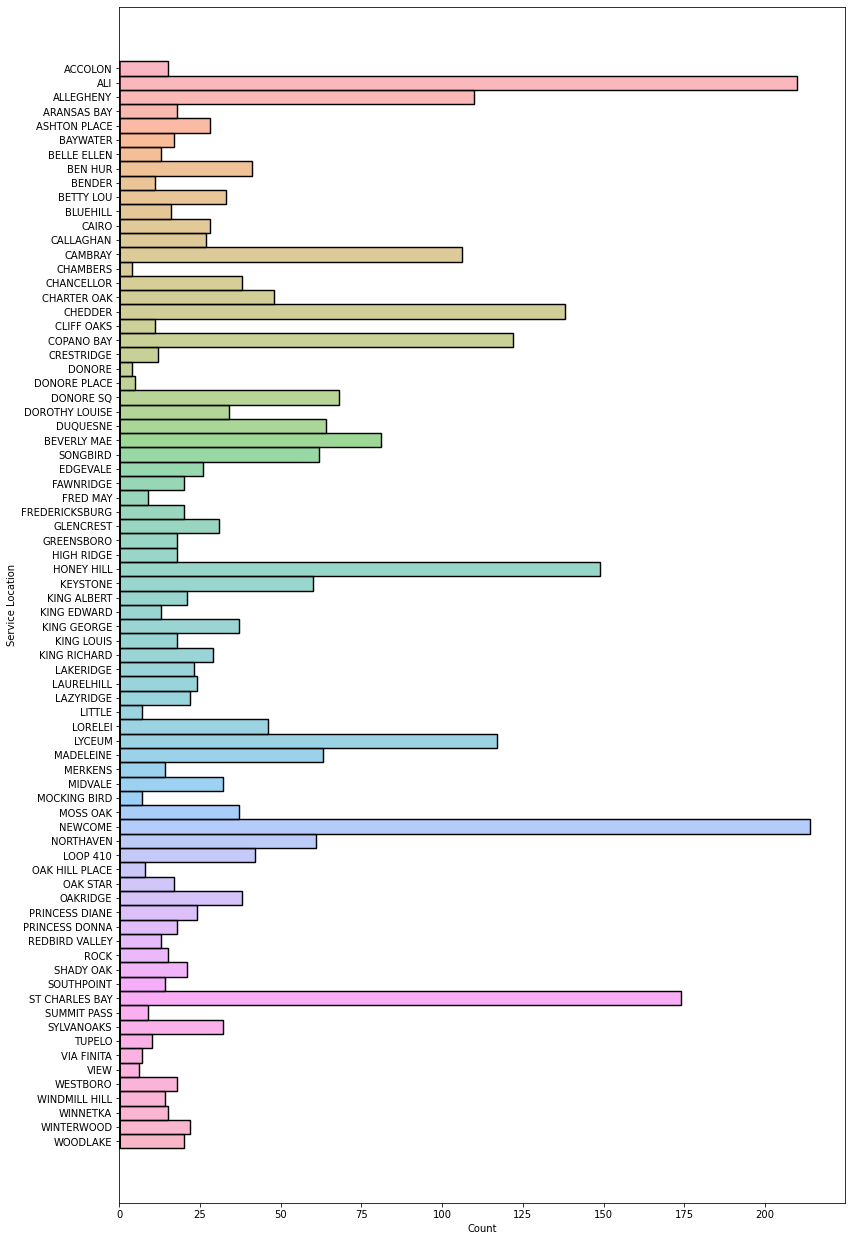

In [25]:
plt.figure(figsize=(13,22))
sns.histplot(y=saws['Service Location'], hue=saws['Service Location'])
plt.legend([],[], frameon=False)
plt.show()